# Algoritmo de Deustch-Jozsa con 3 qubits

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

## Primera parte del circuito 

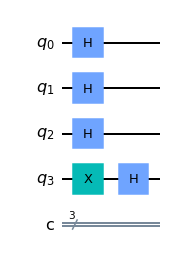

In [6]:
# Recordemos que nuestro estado inicial dado por Qiskit es |0000>
# Como deseamos el estado inicial |0001>, debemos de aplicar la compuerta x al qubit 3

circ1 = QuantumCircuit(4,3)
circ1.x(3)
circ1.h((0,1,2,3))
#circ1.h(range(4))
circ1.draw('mpl')


## Segunda parte del circuito 

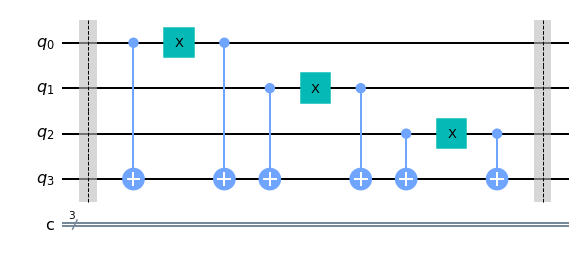

In [8]:
# Vamos a utilizar la funcion constante igual a 1 

circ2 = QuantumCircuit(4,3)
circ2.barrier(range(4))
circ2.cx(0,3)
circ2.x(0)
circ2.cx(0,3)
circ2.cx(1,3)
circ2.x(1)
circ2.cx(1,3)
circ2.cx(2,3)
circ2.x(2)
circ2.cx(2,3)
circ2.barrier(range(4))
circ2.draw("mpl")

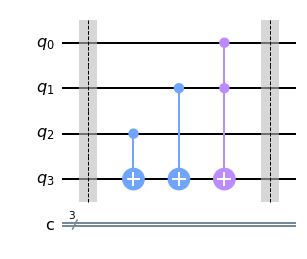

In [25]:
# Funcion balanceada
circ4 = QuantumCircuit(4,3)
circ4.barrier(range(4))
circ4.cx(2,3)
circ4.cx(1,3)
circ4.ccx(0,1,3)
circ4.barrier(range(4))
circ4.draw("mpl")

## Tercera parte del circuito

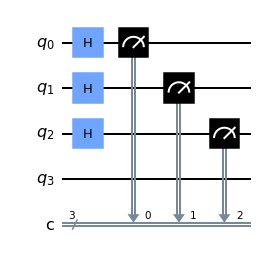

In [9]:
circ3 = QuantumCircuit(4, 3)
circ3.h(range(3))
circ3.measure(range(3), range(3))
circ3.draw("mpl")

## Circuito Final (Funcion constante) 

/var/folders/xv/flnbdkyj7z301sst5cmzz3kr0000gn/T/ipykernel_66159/3040113364.py:5: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circ = circ1 + circ2 + circ3


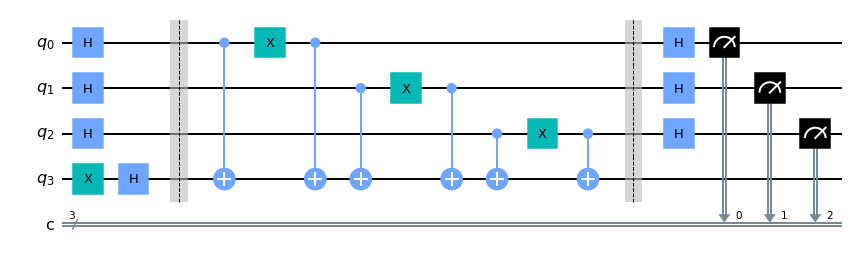

In [20]:
# Si deseamos componer dos partes del circuito, supongamos circ1 + circ2
# circ = circ1 + circ2 
# qc = circ1.compose(circ2, range(4), front=False)
# para el caso de los 3 circuitos
circ = circ1 + circ2 + circ3

circ.draw("mpl")

{'100': 1}


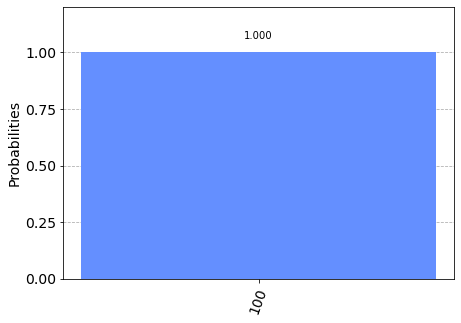

In [28]:
# Usamos un simulador de un computador cuantico
backend = Aer.get_backend("qasm_simulator")

# Ejecutamos el circuito (sobre cual circuito, cual backend y cuantas veces)
job = execute(circ, backend, shots=1)

# MOstramos los resultados de la ejecucion
result = job.result()

# Cuentas de cuantas veces colapsa en cada uno de los estados base
counts = result.get_counts()
print(counts)
plot_histogram(counts)

## Circuito Final (Funcion Balanceada)

/var/folders/xv/flnbdkyj7z301sst5cmzz3kr0000gn/T/ipykernel_66159/1815311386.py:2: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circ = circ1 + circ4 + circ3


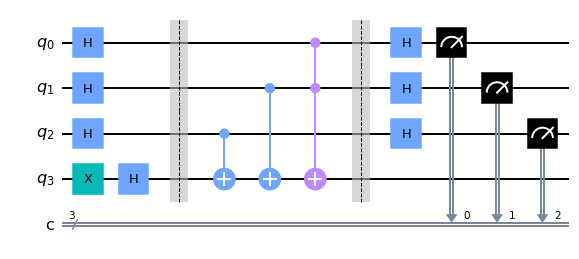

In [32]:
# para el caso de los 3 circuitos
circ = circ1 + circ4 + circ3

circ.draw("mpl")

{'111': 1}


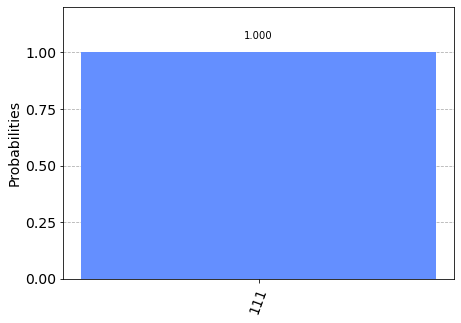

In [33]:
# Usamos un simulador de un computador cuantico
backend = Aer.get_backend("qasm_simulator")

# Ejecutamos el circuito (sobre cual circuito, cual backend y cuantas veces)
job = execute(circ, backend, shots=1)

# MOstramos los resultados de la ejecucion
result = job.result()

# Cuentas de cuantas veces colapsa en cada uno de los estados base
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [34]:
# Vemos que para la funcion constante, obtuvimos el estado |001>. Para la funcion balanceada, 
# obtuvimos el estado |111>.